# DATA_SCI 422 and EARTH 353 | Exercise 4

## Inferring the thickness and resistivity of a subsurface layer.

The electrical resistivity of hidden, subsurface layers can be characterized by passing a DC current into the earth (or other medium) via feeder electrodes, then measuring the Voltage at two reference electrodes. In the "Schlumberger" experiment configuration, the reference electrodes are close together at the center of survey line and the feeder electrodes A and B are further away, one on each side of the center.

The electrical resistiviy of subsurface layers indirectly informs geophysicists of their physical properties, such as composition, fluid content, permeability, porosity, pollutants, etc.

As the supplied current is known, the Voltage measured at the reference electrodes can be converted to an *apparent* electrical resistivity, which represents the combined effect of the resistivities of the indivudual layers that conducted the current. The values of apparent resistivity $r_a$ also depend on the distance between the feeder electrodes A and B. The larger the distance $AB$ the more $r_a$ will be affected by the actual resisitivity of deeper layers. The relation between $r_a$ and $AB$ is strongly non-linear. In this exercise $r_a(AB)$ are the data for our inverse problem. The model parameters in this exercise are the resistivity $r$ and thickness $h$ of a hidden, subsurface layer sandwiched between an upper layer and an underlying halfspace, each with their own resistive properties. The following sketch is a representation of possible electrode configurations.

![title](http://geophysics.earth.northwestern.edu/seismology/suzan/various/Exercise4_configuration.png)

Run the following setup and functions. In this course we do not concern ourselves with the physics of this process and we treat the functions as a black box. The functions are needed to forward-calculate apparent resistivity values, given the distances between electrodes A and B, as well as the resistiviy and thickness of the top layer and the resisitivity of the halfspace.

In [420]:
from numpy import *
def forwres(res,thck,fc,fa,AB):
    ra = zeros(len(AB))
    nlay = len(res)
    fres = [float(r) for r in res]
    pres = array(fres[0:-1])/array(fres[1:nlay])

    for a in arange(len(AB)):        
        for b in arange(len(fc)):
            g=2.00 * fa[b]/AB[a]
            tt=1.00
            for c in arange(nlay-2,-1,-1):  
                tmu = (pres[c] - tt)/(pres[c] + tt)
                r = g * thck[c]
                tex = exp(-r) 
                tmu = tmu * tex
                tt = (1.0 - tmu)/(1.0 + tmu)
            ra[a] = ra[a] + fc[b] * tt
        ra[a] = ra[a] * res[0]
    return ra

In [421]:
def getcoeff():
    fa = zeros(61); fc = zeros(61)
    fa[ 0] = exp(-6.8348046e+00)
    fa[ 1] = exp(-6.6045461e+00)
    fa[ 2] = exp(-6.3742876e+00)
    fa[ 3] = exp(-6.1440291e+00)
    fa[ 4] = exp(-5.9137706e+00)
    fa[ 5] = exp(-5.6835121e+00)
    fa[ 6] = exp(-5.4532536e+00)
    fa[ 7] = exp(-5.2229951e+00)
    fa[ 8] = exp(-4.9927366e+00)
    fa[ 9] = exp(-4.7624781e+00)
    fa[10] = exp(-4.5322196e+00)
    fa[11] = exp(-4.3019611e+00)
    fa[12] = exp(-4.0717026e+00)
    fa[13] = exp(-3.8414441e+00)
    fa[14] = exp(-3.6111856e+00)
    fa[15] = exp(-3.3809271e+00)
    fa[16] = exp(-3.1506686e+00)
    fa[17] = exp(-2.9204101e+00)
    fa[18] = exp(-2.6901516e+00)
    fa[19] = exp(-2.4598931e+00)
    fa[20] = exp(-2.2296346e+00)
    fa[21] = exp(-1.9993761e+00)
    fa[22] = exp(-1.7691176e+00)
    fa[23] = exp(-1.5388591e+00)
    fa[24] = exp(-1.3086006e+00)
    fa[25] = exp(-1.0783421e+00)
    fa[26] = exp(-8.4808358e-01)
    fa[27] = exp(-6.1782508e-01)
    fa[28] = exp(-3.8756658e-01)
    fa[29] = exp(-1.5730808e-01)
    fa[30] = exp( 7.2950416e-02)
    fa[31] = exp( 3.0320892e-01)
    fa[32] = exp( 5.3346742e-01)
    fa[33] = exp( 7.6372592e-01)
    fa[34] = exp( 9.9398442e-01)
    fa[35] = exp( 1.2242429e+00)
    fa[36] = exp( 1.4545014e+00)
    fa[37] = exp( 1.6847599e+00)
    fa[38] = exp( 1.9150184e+00)
    fa[39] = exp( 2.1452769e+00)
    fa[40] = exp( 2.3755354e+00)
    fa[41] = exp( 2.6057939e+00)
    fa[42] = exp( 2.8360524e+00)
    fa[43] = exp( 3.0663109e+00)
    fa[44] = exp( 3.2965694e+00)
    fa[45] = exp( 3.5268279e+00)
    fa[46] = exp( 3.7570864e+00)
    fa[47] = exp( 3.9873449e+00)
    fa[48] = exp( 4.2176034e+00)
    fa[49] = exp( 4.4478619e+00)
    fa[50] = exp( 4.6781204e+00)
    fa[51] = exp( 4.9083789e+00)
    fa[52] = exp( 5.1386374e+00)
    fa[53] = exp( 5.3688959e+00)
    fa[54] = exp( 5.5991544e+00)
    fa[55] = exp( 5.8294129e+00)
    fa[56] = exp( 6.0596714e+00)
    fa[57] = exp( 6.2899299e+00)
    fa[58] = exp( 6.5201884e+00)
    fa[59] = exp( 6.7504469e+00)
    fa[60] = exp( 6.9807054e+00)

    fc[ 0] = 7.3260937e-04
    fc[ 1] = 5.6326423e-04
    fc[ 2] = 1.3727237e-04
    fc[ 3] = 7.5331222e-04
    fc[ 4] = 3.5918326e-04
    fc[ 5] = 1.0500608e-03
    fc[ 6] = 7.1530982e-04
    fc[ 7] = 1.5160070e-03
    fc[ 8] = 1.2841617e-03
    fc[ 9] = 2.2497985e-03
    fc[10] = 2.1906186e-03
    fc[11] = 3.4076782e-03
    fc[12] = 3.6321245e-03
    fc[13] = 5.2376028e-03
    fc[14] = 5.9212519e-03
    fc[15] = 8.1315877e-03
    fc[16] = 9.5527062e-03
    fc[17] = 1.2708615e-02
    fc[18] = 1.5305589e-02
    fc[19] = 1.9941086e-02
    fc[20] = 2.4396626e-02
    fc[21] = 3.1333652e-02
    fc[22] = 3.8683065e-02
    fc[23] = 4.9127993e-02
    fc[24] = 6.0824806e-02
    fc[25] = 7.6314344e-02
    fc[26] = 9.3928346e-02
    fc[27] = 1.1545027e-01
    fc[28] = 1.3868663e-01
    fc[29] = 1.6248847e-01
    fc[30] = 1.8114332e-01
    fc[31] = 1.8424433e-01
    fc[32] = 1.5556741e-01
    fc[33] = 6.8592481e-02
    fc[34] = -8.8339029e-02
    fc[35] = -2.8819226e-01
    fc[36] = -3.5565260e-01
    fc[37] = -5.6288677e-02
    fc[38] = 4.8186942e-01
    fc[39] = -5.1516453e-02
    fc[40] = -2.6102989e-01
    fc[41] = 2.1416490e-01
    fc[42] = -9.4490687e-02
    fc[43] = 2.6196370e-02
    fc[44] = -5.1097828e-04
    fc[45] = -6.6032948e-03
    fc[46] = 7.5193619e-03
    fc[47] = -6.7854344e-03
    fc[48] =  5.8044372e-03
    fc[49] =  -4.9354894e-03
    fc[50] =  4.2323106e-03
    fc[51] =  -3.6733648e-03
    fc[52] =  3.2266260e-03
    fc[53] =  -2.8649137e-03
    fc[54] =  2.5677680e-03
    fc[55] =  -2.3202655e-03
    fc[56] =  2.1115187e-03
    fc[57] =  -1.9334662e-03
    fc[58] =  1.7800248e-03
    fc[59] =  -1.6465436e-03
    fc[60] =  1.3468317e-03
    return fa,fc

**Question 1**: Read the distance $AB$ (in $m$) and $r_a$ (in $Ohm\cdot m$) from the two columns of the file `abra.txt`, respectively, and plot $r_a(AB)$. The values of $r_a$ differ by orders of magnitude, so it appears better to use $log(r_a)$ rather than $r_a$ as data $\mathbf{d}$ for the inverse problem. Since $AB$ is varied logarithmically in this experiment, plot $log(r_a)$ against $log(AB)$.

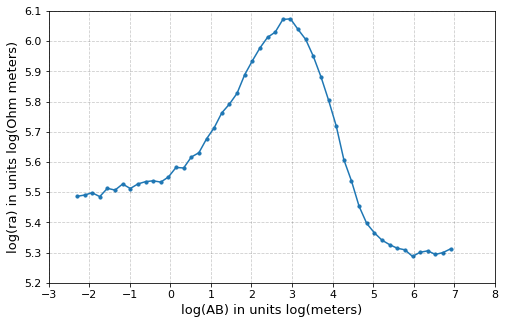

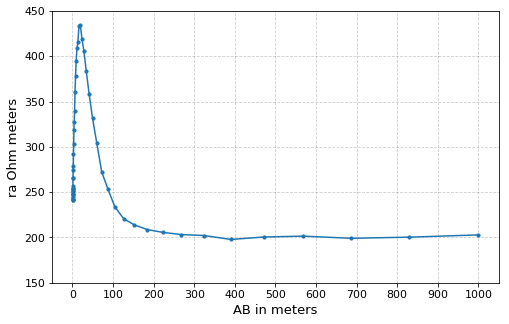

In [422]:
# Read the distance AB (in m) and ra (in Ohm m) from the two columns of abra.txt
def readdata(fname):
    data = open(fname,'r').readlines()
    AB_rd = array([float(s.split()[0]) for s in data])
    raobs_rd = array([float(s.split()[1]) for s in data])
    return AB_rd,raobs_rd

AB_rd, raobs_rd = readdata('abra.txt')
AB = AB_rd
raobs = raobs_rd

logAB = []; log_raobs = []
for i in range(len(AB)):
    logAB.append(math.log(AB[i]))
    log_raobs.append(math.log(raobs[i]))

# Plot ra against AB normally and logarithmically
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(logAB,log_raobs,s=10,c='tab:blue')
plt.plot(logAB,log_raobs,c='tab:blue')
plt.ylim(5.2,6.1); plt.xlim(-3,8)
plt.yticks([5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1], fontsize = 11) 
plt.xticks([-3,-2,-1,0,1,2,3,4,5,6,7,8], fontsize = 11) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('log(AB) in units log(meters)', fontsize = 13)
plt.ylabel('log(ra) in units log(Ohm meters)', fontsize = 13)
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(AB,raobs,s=10,c='tab:blue')
plt.plot(AB,raobs,c='tab:blue')
plt.xlim(-50,1050), plt.ylim(150,450)
plt.xticks([0,100,200,300,400,500,600,700,800,900,1000], fontsize = 11) 
plt.yticks([150,200,250,300,350,400,450], fontsize = 11) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('AB in meters', fontsize = 13)
plt.ylabel('ra Ohm meters', fontsize = 13)
plt.show()

In [423]:
print(max(raobs))

434.47401312745205


**Question 2**: The range for distances AB in this experiment is large and the apparent resisitivity varies little near the limits of the range. Therefore the value of $r_a$ at the smallest distance $AB$ approximately represents the resisitivity of the top layer. Likewise, the value of $r_a$ at the largest distance $AB$ approximately represents the resistivity of the underlying halfspace. 

Your plot of $log(r_a)$ vs. $log(AB)$ (or that of $r_a$ vs. $AB$) shows that there is at least one layer between the top layer and the underlying halfspace that causes a higher apparent resisitivity for a certain range of $AB$ than cannot be produced by the top layer and underlying halfspace alone. 

Assume that we have independent information on the thickness of the top layer. Then only two unknown model parameters remain: the resistivity $r$ and thickness $h$ of the second layer. 

Make an initial guess for $r$ and $h$ for the second layer, motivate/explain your guess, and enter these values in the following definition of the layer-resistivity vector and the layer-thickness vector that together describe the layered model.

In [424]:
######### Justification needed
# r_new is a list of the resistivities of the top (r1) and second layers (r2), and of the 
# underlying halfspace (r3).  r1 and r3 are estimated from the data you plotted above.
r1 =   240 
# ------------------------------------- Justification start
# Decided r1 from reading from the data plot, where at the 0 distance between AB
# the resistency is around 240 (from visually looking at the plot)
# The actual value is 241.3350689057245 Ohm m. 240 Ohm m is very close.
# ------------------------------------- Justification end
r3 =   200 
# ------------------------------------- Justification start
# Decided r3 from reading from the data plot, where at tail end of distance between AB
# the resistency is around 200 (from visually looking at the plot)
# The actual value is 202.86361118816782 Ohm m. 200 Ohm m is very close.
# ------------------------------------- Justification end

# r2 is one of the two unknown model parameters for this inverse problem.
# h_new is a list of the thickness of the top (h1) and of the second layer (h2). 
# We have independent evidence of the value of h1
h1 = 6.6 # given
# h2 is the other of the two unknown model parameters for this inverse problem.

# r2 and h2 are both unknown, but here is where you can make an initial guess:
r2 = 430        # make a decent initial guess (is r2 > or < r1? is r2 > or < r3?) (see plot)
# ------------------------------------- Justification start
# At this point, I think r2 is where there is hump in the graph. So I decided that r2
# should be at least max(raobs), which is 434.47401312745205 Ohm m. 430 is close.
# r2 should be greater than r1 and greater than r3, as there is a 'hump-like' shape.
# ------------------------------------- Justification end

h2 = 16.5       # make a decent initial guess (is h2 > or < h1?) (see plot)
# ------------------------------------- Justification start
# I think h2 should be half the width of the hump-like shape. From the log graph,
# it looks like the full width could be between e^6 and e^4.5. So half width would
# be e^3 (or 20m) and e^2.25 (or 9.5m). I then thought that h2 should be between 
# 20m and 9.5m. I thus picked 16.5m, but any number in this range should be ok.
# ------------------------------------- Justification end

r_new = [ r1,  r2,   r3]  
h_new = [ h1,  h2]

In [425]:
print(r_new)
print(h_new)

[240, 430, 200]
[6.6, 16.5]


Although the 50 data points and 2 model parameters in this inverse problem provide 50 equations to solve for 2 unknowns, this does not necessarily tell us if the problem is over-, under-, or mixed-determined. This is so firstly because the data depend non-linearly on the model parameters, and secondly because the data are not all or completely independent from one another. In this exercise we will solve the non-linear problem in three different ways.

**Question 3**: First we will apply the Newton-Raphson method, which finds the solution by iteratively solving a linearized version of the inverse problem. Yes, you have already applied this method before, in exercsies 1 and 3. The Newton-Raphson method belongs to a group of directed search methods for non-linear problems to which the Levenberg-Marquardt, conjugate gradients, and gradient/steepest descent methods belong as well.

Due to the strongly non-linear nature of the inverse problem this procedure is not guaranteed to converge from each set of starting values. Due to the complexity of the relation between $r_a$ and $AB$, and unlike in exercise 1 and 3, the partial derivatives that compose the matrix $\mathbf{G}$ of the linearized problem cannot be computed analytically. Therefore we approximate them with a finite difference method. 

For a given series of distances $AB$ and a given model $(r, h)$ the Python function `forwres()` (defined above) provides the value for the corresponding apparent resistivity $r_a$. As it is not likely that this problem is overdetermined we apply a regularized least squares inversion to the linearized problem $\mathbf{G m} = \mathbf{d}$,
where $\mathbf{d} = log(r_{a}^{observed}) - log(r_{a}^{predicted})$ and $\mathbf{m} = [r2, h2]$.

In the following code, set 
a) a convergence criterion based on both the data fit and on how much the model is changing with repect to the previous iteration. 
b) Also set the 2x2 regularization matrix $\mathbf{R}$. For a damped least squares inversion use $\mathbf{R} = \epsilon \mathbf{I}$.
Then run it until the inversion procedure has converged. This is solution 1. Make sure you print the solution and plot the corresponding data fit.

In [426]:
# Replace the zeros in R with actual values of a regularization (or model weighting) matrix.
# for damping, use eps = 0.01, for example
eps = 0.001 #change to 0.01
R = eps * array([[1, 0], 
                 [0, 1]])

# read filter coefficients:
fa,fc = getcoeff()
# Initial model. Resistivity and thickness vectors already entered above. 
# Calculate predicted data and residuals

def solver(r_new,h_new,R):
    racalc = forwres(r_new,h_new,fc,fa,AB)
    res = log10(raobs/racalc)
    
    G = zeros([50,2]) 
    iteration_running = 0
    
    chi2_prev = (1/50) * sum((res/0.004)**2)
    
    chi2_list = []; r_newlist = []; h_newlist = []
    while ( chi2_prev > 1.1):
        iteration_running = iteration_running + 1
        r = r_new
        h = h_new
        
        dr = 0.05*r[1] ; r[1] = r[1] + dr
        ratmp = forwres(r,h,fc,fa,AB)
        G[:,0] = log10(ratmp/racalc)/dr
        r[1] = r[1] - dr 
        dh = 0.05*h[1] ; h[1] = h[1] + dh 
        ratmp = forwres(r,h,fc,fa,AB)
        G[:,1] = log(ratmp/racalc)/dh
        h[1] = h[1] - dh 
        
        m = dot(linalg.inv(dot(G.T,G) + dot(R.T,R)),dot(G.T,res))
        r_new[1] = r[1] + m[0]
        h_new[1] = h[1] + m[1]
    # #     Calculate residuals
        racalc = forwres(r_new,h_new,fc,fa,AB)
        res = log10(raobs/racalc)
        chisquared = (1/50) * sum((res/0.004)**2)
        chi2_prev = chisquared
        chi2_list.append(chisquared)

    return(r_new,h_new,iteration_running, G)

r_sol,h_sol,iteration_running, G = solver(r_new,h_new,R)

In [427]:
# Print the solution
print('Solution 1:', r_sol[1], h_sol[1])
print('Number of iterations:', iteration_running)

Solution 1: 1122.3888847409248 13.801354981935782
Number of iterations: 71


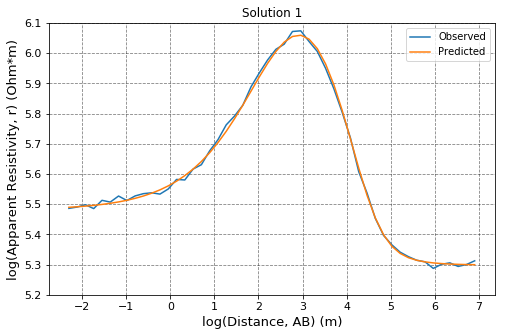

In [428]:
# Plot corresponding data fit
rapred_sol1 = forwres(r_sol, h_sol, fc, fa, AB)

plt.figure(figsize=(8,5))
plt.title('Solution 1')
plt.ylim(5.2,6.1)
plt.yticks([5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1], fontsize = 11) 
plt.xticks([-3,-2,-1,0,1,2,3,4,5,6,7,8], fontsize = 11) 
plt.plot(log(AB),log(raobs),label="Observed")
plt.plot(log(AB),log(rapred_sol1),label="Predicted")
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.5)
plt.xlabel('log(Distance, AB) (m)', fontsize = 13)
plt.ylabel('log(Apparent Resistivity, r) (Ohm*m)', fontsize = 13)
plt.legend()
plt.show()

**Question 4**: Print the $r$ and $h$ values of solution 1, plot the associated predicted data along with the observations, and compute solution 2 as follows:

In the damped least squares inversion (that led to solution 1), we used uniform estimates ($\mathbf{R} = \epsilon \mathbf{I}$) for the prior values of two completely different quantities, resistivity (in $Ohm \cdot m$) and thickness (in $m$).  Now set the regularization matrix $\mathbf{R} = \mathbf{C}_{m}^{-1/2}$, the matrix of the reciprocals of the square roots of the prior model variances, or model weighting matrix. In other words, $\mathbf{C}_{m}^{+1/2}$ contains the prior expectation values for the model parameter deviations. In this diagonal matrix, the $i$-th diagonal element $= 1/s_i$, where $s_i$ is the prior expectation value for the corresponding quantity.

Now set $\mathbf{R}$ using the prior values as described and re-run the code until convergence. This is solution 2. Make sure to print the solution and plot the associated predicted data along with the observations. 

Solution 2: 1121.389888921461 13.797678758583501
Number of iterations: 412


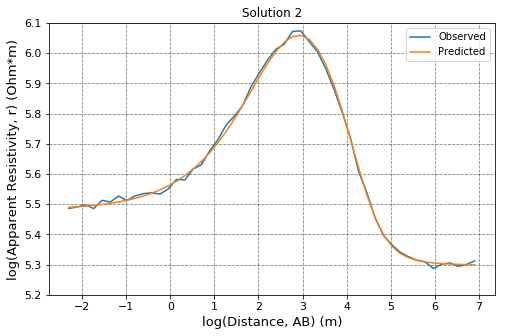

In [429]:
R2 = array([[1/433, 0],[0,1/16.5]])

r_new = [ r1,  r2,   r3]  
h_new = [ h1,  h2]

r_sol2,h_sol2,iteration_running2,G2= solver(r_new,h_new,R2)

# Print the solution
print('Solution 2:', r_sol2[1], h_sol2[1])
print('Number of iterations:', iteration_running2)

rapred_sol2 = forwres(r_sol2, h_sol2, fc, fa, AB)

# Plot corresponding data fit
plt.figure(figsize=(8,5))
plt.title('Solution 2')
plt.ylim(5.2,6.1)
plt.yticks([5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1], fontsize = 11) 
plt.xticks([-3,-2,-1,0,1,2,3,4,5,6,7,8], fontsize = 11) 
plt.plot(log(AB),log(raobs),label="Observed")
plt.plot(log(AB),log(rapred_sol2),label="Predicted")
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.5)
plt.xlabel('log(Distance, AB) (m)', fontsize = 13)
plt.ylabel('log(Apparent Resistivity, r) (Ohm*m)', fontsize = 13)
plt.legend()
plt.show()

**Question 5**: Now solve the problem without regularization. In practical terms, this is easiest to accomplish by setting $\mathbf{R} = [[0,0],[0,0]]$. How does this work or progress? What is different in the process and in the solution from the process for solutions 1 and 2?

In [432]:
# ------------------------------------- Answer Start
# There are only 7 iterations required for Solution 3. 
# The regularization matrix is set to 0, so there is no regularization.
# In the algorithm, changing R changes the model vector m, which was
# computed as dot(linalg.inv(dot(G.T,G) + dot(R.T,R)),dot(G.T,res))
# which is essentially just dot(linalg.inv(dot(G.T,G)),dot(G.T,res))
# as R.T@R is 0. This leads us to the question of why we use regular
# -ization at all. Regularization is the process of adding 
# information to solve an ill-posed problem or prevent
# overfitting. It reduces the generalization error. The expectation
# here is that since there is no regularization, Solution 3 
# might include overfitting. 
# Solution 3: 1206.9918 Ohm m ___________ 12.842 m
# Solution 2: 1121.3899 Ohm m ___________ 13.798 m
# Solution 1: 1122.3889 Ohm m ___________ 13.801 m
# Here, we see that Solutions 1 and 2 are much closer to each other
# than to Solution 3.
# ------------------------------------- Answer End

Solution 3: 1206.9918119344643 12.841991605977762
Number of iterations: 7


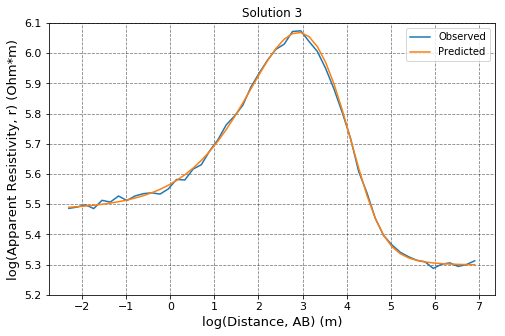

In [433]:
R3 = array([[0, 0],[0,0]])

r_new = [ r1,  r2,   r3]  
h_new = [ h1,  h2]

r_sol3,h_sol3,iteration_running3, G3 = solver(r_new,h_new,R3)

# Print the solution
print('Solution 3:', r_sol3[1], h_sol3[1])
print('Number of iterations:', iteration_running3)

rapred_sol3 = forwres(r_sol3, h_sol3, fc, fa, AB)

# Plot corresponding data fit
plt.figure(figsize=(8,5))
plt.title('Solution 3')
plt.ylim(5.2,6.1)
plt.yticks([5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1], fontsize = 11) 
plt.xticks([-3,-2,-1,0,1,2,3,4,5,6,7,8], fontsize = 11) 
plt.plot(log(AB),log(raobs),label="Observed")
plt.plot(log(AB),log(rapred_sol3),label="Predicted")
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.5)
plt.xlabel('log(Distance, AB) (m)', fontsize = 13)
plt.ylabel('log(Apparent Resistivity, r) (Ohm*m)', fontsize = 13)
plt.legend()
plt.show()

**Question 6**: Fourthly, we will apply a systematic grid search to find the minimum of the objective function of the non-linear problem. The grid search method is a "brute-force" method. Write  Python code that computes the objective function for all values of $\mathbf{m} = [r2, h2]$ on a grid around the region that likely encloses the minimum of the objective function. As usual, the objective function $E(\mathbf{m}) = (\mathbf{d_o}-\mathbf{d_p})^T \cdot (\mathbf{d_o} - \mathbf{d_p})$. For which grid point is the value of $\mathbf{m}$ is $E(\mathbf{m})$ minimal? This is solution 4.

In [434]:
ngrid = 100 #change this to 40. It runs relatively quickly. At 100, it is quite slow.
ri = linspace(rmin, rmax, ngrid+1)
hi = linspace(hmin, hmax, ngrid+1)

E = zeros([len(ri),len(hi)])
for i in arange(len(ri)):
    for j in arange(len(hi)):
        r2 = ri[i]
        h2 = hi[j]
        r_new = [r1,r2,r3]
        h_new = [h1,h2]
        rped = forwres(r_new,h_new, fc, fa, AB)
        E[j,i] = (raobs - rped).transpose() @ (raobs - rped)

Solution 4: 1241.0 12.16


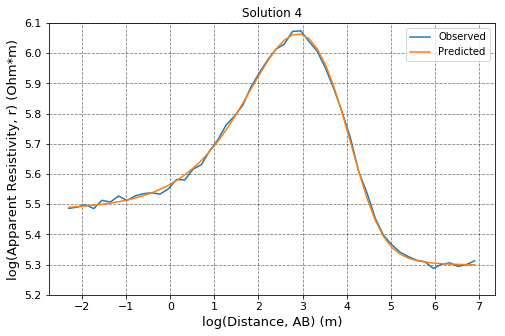

In [435]:
Emin = min([min(list) for list in E])
for i in range(len(ri)):
    for j in range(len(hi)):
        if E[j,i] == Emin:
            r_sol4_ = ri[i]
            h_sol4_ = hi[j]
print('Solution 4:', r_sol4_, h_sol4_) # answers "For which grid point is the value of m is E(m) minimal?"
r_sol4 = [240, r_sol4_, 200]
h_sol4 = [6.6, h_sol4_]

rapred_sol4 = forwres(r_sol4, h_sol4, fc, fa, AB)

plt.figure(figsize=(8,5))
plt.title('Solution 4')
plt.ylim(5.2,6.1)
plt.yticks([5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1], fontsize = 11) 
plt.xticks([-3,-2,-1,0,1,2,3,4,5,6,7,8], fontsize = 11) 
plt.plot(log(AB),log(raobs),label="Observed")
plt.plot(log(AB),log(rapred_sol4),label="Predicted")
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.5)
plt.xlabel('log(Distance, AB) (m)', fontsize = 13)
plt.ylabel('log(Apparent Resistivity, r) (Ohm*m)', fontsize = 13)
plt.legend()
plt.show()

**Question 7**: Compare solutions 1, 2, 3 and 4, and the iterative (if any) pathways that led to the solutions. Explain similarities and differences. Include visuals. Make a contour plot of $E(\mathbf{m})$ with $r2$ and $h2$ on the horizontal axes. A contour plot of $E(\mathbf{m})$ vs. $log(r2)$ and $log(h2)$ is also be helpful. 


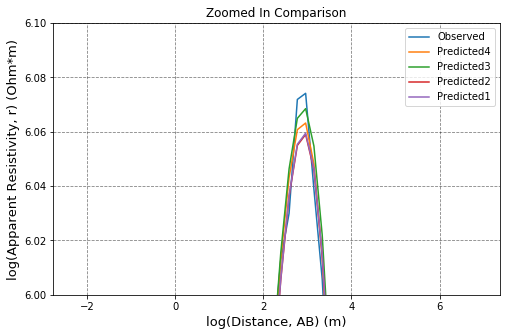

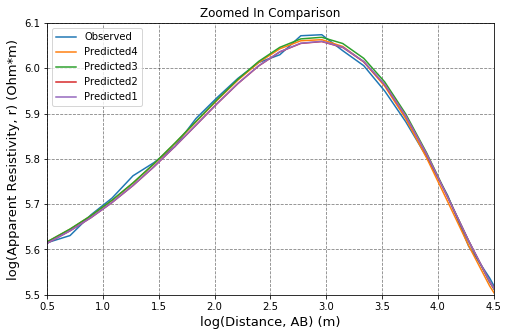

In [436]:
plt.figure(figsize=(8,5))
plt.title('Zoomed In Comparison')
plt.ylim(6.0,6.1)
plt.plot(log(AB),log(raobs),label="Observed")
plt.plot(log(AB),log(rapred_sol4),label="Predicted4")
plt.plot(log(AB),log(rapred_sol3),label="Predicted3")
plt.plot(log(AB),log(rapred_sol2),label="Predicted2")
plt.plot(log(AB),log(rapred_sol1),label="Predicted1")
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.5)
plt.xlabel('log(Distance, AB) (m)', fontsize = 13)
plt.ylabel('log(Apparent Resistivity, r) (Ohm*m)', fontsize = 13)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.title('Zoomed In Comparison')
plt.xlim(0.5,4.5)
plt.ylim(5.5,6.1)
plt.plot(log(AB),log(raobs),label="Observed")
plt.plot(log(AB),log(rapred_sol4),label="Predicted4")
plt.plot(log(AB),log(rapred_sol3),label="Predicted3")
plt.plot(log(AB),log(rapred_sol2),label="Predicted2")
plt.plot(log(AB),log(rapred_sol1),label="Predicted1")
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.5)
plt.xlabel('log(Distance, AB) (m)', fontsize = 13)
plt.ylabel('log(Apparent Resistivity, r) (Ohm*m)', fontsize = 13)
plt.legend()
plt.show()

In [437]:
X,Y = meshgrid(ri, hi)

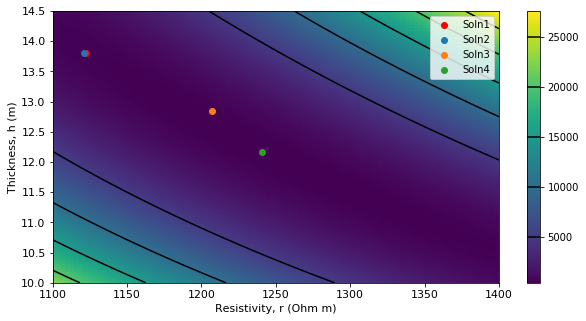

In [438]:
plt.figure(figsize=(10,5))
PC = plt.pcolor(X, Y, E)
CF = plt.contour(X, Y, E, 6, colors = "black")
plt.scatter(r_sol[1], h_sol[1], color = 'red', label = 'Soln1')
plt.scatter(r_sol2[1], h_sol2[1], label = 'Soln2')
plt.scatter(r_sol3[1], h_sol3[1], label = 'Soln3')
plt.scatter(r_sol4_, h_sol4_, label = 'Soln4')
plt.yticks([10,10.5,11.0,11.5,12.0,12.5,13.0,13.5,14.0,14.5], fontsize = 11)
plt.xticks([1100,1150,1200,1250,1300,1350,1400], fontsize = 11) 
plt.ylabel('Thickness, h (m)', fontsize = 11)
plt.xlabel('Resistivity, r (Ohm m)', fontsize = 11)
cbar = plt.colorbar(PC)
cbar.add_lines(CF)
plt.legend()
plt.show()

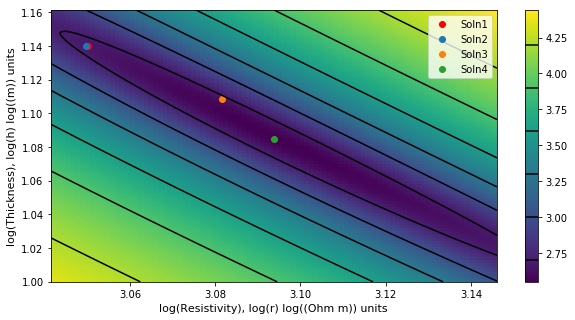

In [439]:
plt.figure(figsize=(10,5))
PC = plt.pcolor(log10(X), log10(Y), log10(E))
CF = plt.contour(log10(X), log10(Y), log10(E), 6, colors = "black")
plt.scatter(log10(r_sol[1]), log10(h_sol[1]), color = 'red', label = 'Soln1')
plt.scatter(log10(r_sol2[1]), log10(h_sol2[1]), label = 'Soln2')
plt.scatter(log10(r_sol3[1]), log10(h_sol3[1]), label = 'Soln3')
plt.scatter(log10(r_sol4_), log10(h_sol4_), label = 'Soln4')
plt.ylabel('log(Thickness), log(h) log((m)) units', fontsize = 11)
plt.xlabel('log(Resistivity), log(r) log((Ohm m)) units', fontsize = 11)
cbar = plt.colorbar(PC)
cbar.add_lines(CF)
plt.legend()
plt.show()

------------------------------------- Answer Start

Solution 4: 1241.0 Ohm m ___________ 12.16 m ___ Grid search

Solution 3: 1206.9918 Ohm m ___________ 12.842 m ___ No regularization

Solution 2: 1121.3899 Ohm m ___________ 13.798 m ___ Model weighting

Solution 1: 1122.3889 Ohm m ___________ 13.801 m ___ Damped least squares solution

Here, we see that Solutions 1 and 2 are much closer to each other than to Solution 3. Solution 4 has the highest resistivity and smallest thickness. Solution 2, which is the model weighting method, is very similar to Solution 1. From the Zoomed In Figures, I have zoomed in on some areas that I initially saw some differences, which is near/at the peak. Solution 3 is closest to the observed, followed by Solution 4. It is difficult to distinguish between Solution 1 and 2. From the contour plots (particularly the log contour plot), we see that Solutions 1 and 2 are near the top left edge of the innermost contour. In the middle, Solution 4 lies (which makes sense) as we searched through matrix E to determine the solution itself. Solution 3 lies near the middle edge of the contour and is closer to the minimum of the contours. Solution 2 required the greatest number of iterations > 400. Solution 1 required 71. Solution 3 required only 7. Solution 4 solved the problem completely differently.

The process of solving Solution 1 and 2 are similar. It solves iteratively with regularization. The regularization matrix for Solution 2 is larger than that of 1, so it makes sense that Solution 2 resistivity and thickness is most conservative. Solution 4 is a 'brute-force' method that does not take into consideration Chi2 values, which is a measure of statistical significance. Would be useful to find whether Solution 4 is statistically significant. In Solution 4, we're just looking for the minimum with the grid, so this is only as precise as the grid resolution. Solution 3, because there is no regularization, it seems that the iterations are more different from before (larger steps) due to no other constraints. 

------------------------------------- Answer End

**Question 8**: We know that the accuracy with which we can determine the model parameters is proportional to the second derivative (curvature) of the objective function to the model parameters around the minimum. Would the weighted sum or the difference between `r2` and `h2` (or $log(r2)$ and $log(h2))$ be more precisely determined than the other, and what evidence exists to support your answer?
Calculate the standard deviation in the resisitvity and thickness of layer 2 from the posterior modelcovariance matrix, given that the standadr deviation in the observed apparent resistivities is approximately 1%, which is 0.004 in $log(r_{a}^{observed})$.

In [440]:
# calculate the standard deviations in the resistivity and thickness of layer 2 from the posterior model cov matrix
from numpy.linalg import inv
import numpy as np

G = G2
cov_m = (0.004 ** 2) * linalg.inv(G.T @ G)
print(cov_m)

[[ 9.14896997e+02 -5.97024942e+00]
 [-5.97024942e+00  4.08224210e-02]]


In [441]:
from matplotlib.patches import Ellipse
# 1 standard deviation
w,v = np.linalg.eig(cov_m)
major = 2*sqrt(w[0])
minor = 2*sqrt(w[1])
rota = degrees(np.arctan2(v[1,0],v[0,0]))
e = Ellipse((r_sol2[1],h_sol2[1]),major,minor,rota)
e.set_alpha(0.1)
print(e)

Ellipse(xy=(1121.389888921461, 13.797678758583501), width=60.49581659033818, height=0.08632260176133984, angle=-0.3738846414062393)


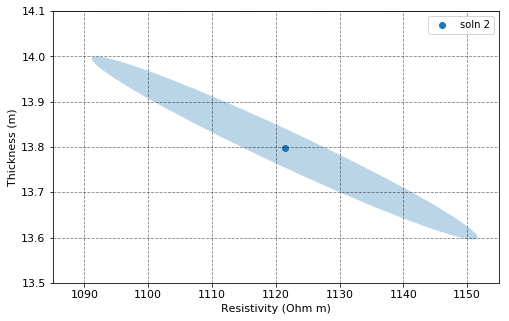

In [442]:
from matplotlib.patches import Ellipse
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt

e_patch = mpl.patches.Ellipse(xy=(1121.389888921461, 13.797678758583501), width=60.49581659033818, height=0.08632260176133984, angle=-0.3738846414062393,alpha=0.3)
fig, ax = plt.subplots(figsize=(8, 5))
plt.grid(linestyle="--", color='black',zorder=0,alpha=0.5)
ax.add_patch(e_patch)

ax.set_xlim(1085, 1155)
ax.set_ylim(13.5, 14.1)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xlabel('Resistivity (Ohm m)',fontsize=11)
ax.set_ylabel('Thickness (m)',fontsize=11)
ax.scatter(r_sol2[1], h_sol2[1], label = 'soln 2') 
plt.legend()
plt.show()

------------------------------------- Answer Start
I generated a covariance matrix and error ellipse using G2 (from Method 2). The resistivity has a STD of 914.9 Ohm m, which is rather large. The thickness STD is 0.041m, which is much smaller. There may be a problem with my calculation of the covariance matrix. From here, the weighted sum of difference of h2 is liekly more precisely determined than the other (given that the resistivity STD is larger).
------------------------------------- Answer End